# Overview

Python is great for many reasons including: 

- High−level (so you can focus on your problem).  
- Clean, readable, and efficient.
- Easy and fun to learn.
- Dynamic.
- Fast to write and test code.
- Less code.
- Flexible.
- Interactive.
- Great support
- Open source.
- Vast range of libraries.
- Huge number of users.

However, sometimes it can be slow. Often this isn't an issue. Though when it is, it's useful to know how to speed it up.  

That's what this workshop is all about.

## Hang on, don't optimise too early

There are trade-offs when you pursue faster code. For example, it may become more complex, use more memory, or become less readable. This is in addition to the optimisation process taking time and effort. So, before jumping into optimising code, check that:

- The code is correct?
    - Have you tested it?
    - Does it have documentation?
- Is optimisation really needed?
    - Have you profiled the code?
    - If optimisation is needed, then first:
        - Have you tried more suitable algorithms and data structures?
        - Have you tried vectorisation?
        - Have you tried compiling the code?
    - If that's still not enough, then:
        - Try parallelisation.
        - Try offloading the work to accelerators.

*Plot idea from [Dask-ML](https://ml.dask.org/).*

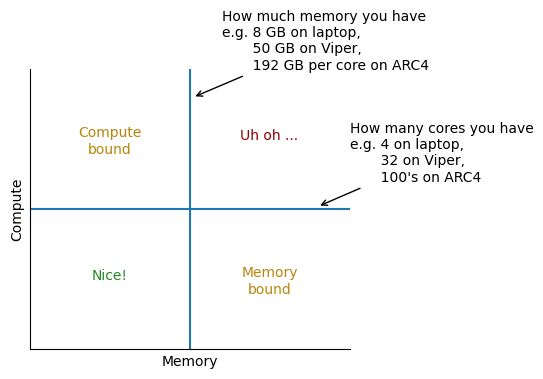

In [1]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(4, 4), dpi=100)
ax = fig.add_axes((0.1, 0.2, 0.8, 0.7))
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.set_xticks([])
ax.set_yticks([])
ax.set_ylim([0, 1])
ax.set_xlim([0, 1])
plt.axhline(y=0.5, linestyle='-')
plt.axvline(x=0.5, linestyle='-')
ax.annotate('Compute\nbound', xy=(0.25, 0.7), ha='center', color='darkgoldenrod')
ax.annotate('Memory\nbound', xy=(0.75, 0.2), ha='center', color='darkgoldenrod')
ax.annotate('Nice!', xy=(0.25, 0.25), ha='center', color='forestgreen')
ax.annotate('Uh oh ...', xy=(0.75, 0.75), ha='center', color='darkred')
ax.annotate(
    "How many cores you have\ne.g. 4 on laptop,\n       32 on Viper,\n       100's on ARC4",
    arrowprops=dict(arrowstyle='->'),
    xy=(0.9, 0.51),
    xytext=(1, 0.6),
    fontsize=10
)
ax.annotate(
    "How much memory you have\ne.g. 8 GB on laptop,\n       50 GB on Viper,\n       192 GB per core on ARC4",
    arrowprops=dict(arrowstyle='->'),
    xy=(0.51, 0.9),
    xytext=(0.6, 1),
    fontsize=10
)
ax.set_xlabel('Memory')
ax.set_ylabel('Compute')
plt.show()

## How fast could it go?

It's useful to know how code speed is measured. Miles per hour? Bits per second?

The speed of code doesn't have specific units like that. For one reason, this is because computers vary a lot.

Instead, it's normally measured in *order of operations (O) per element (n)*.  
- This means how many operations are needed as the number the elements gets bigger.  
- The order of operations is called [Big O notation](https://www.bigocheatsheet.com/).  
- The operations are given as the largest order of a polynomial, ignoring any constants.  
    - For example, O(2n<sup>2</sup> + 3n) would just become O(n<sup>2</sup>).  
- This becomes important when the number of elements is large.  
- It's often measured for a typical case.  
- Constant time means per machine operation.  

A nice example from [Ned Batchelder's](https://www.youtube.com/watch?v=duvZ-2UK0fc) PyCon talk is for counting beans in a jar.
- *Method 1*: If you count each bean one by one as you pick it out of the jar, then this would be an O(n) time operation. So for a new jar of beans, you'll have to repeat this operation for *every* bean in the jar. Think of making tally marks for each one.  
- *Method 2*: You have a label on the front of the jar, which tells you how many beans are in it. For this method, no matter how many beans are in there, the time of the operation stays the same at O(1).

![counting_beans.png](images/counting_beans.png)  

Memory is measured in the same way.  

Both of these two measurements together represent the *time-space complexity* of your code.  

You can compare the lines for the different time-space complexities on the plot below:

*Note, logs here are base 2.*

*Plot idea from [Big O Cheat Sheet](https://www.bigocheatsheet.com/)*.  

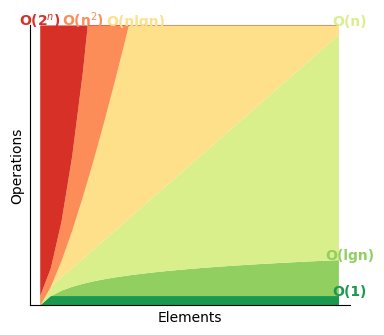

In [2]:
max_value = 30
elements = np.arange(1, max_value)

fig = plt.figure(figsize=(4, 4), dpi=100)
ax = fig.add_axes((0.1, 0.2, 0.8, 0.7))
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.set_xticks([])
ax.set_yticks([])
ax.set_ylim([0, max_value])
ax.set_xlim([0, max_value])
ax.set_xlabel('Elements')
ax.set_ylabel('Operations')

complexities = ['O(1)', 'O(lgn)', 'O(n)', 'O(nlgn)', 'O(n$^2$)', 'O(2$^n$)']
colours = list(reversed(['#d73027', '#fc8d59', '#fee08b', '#d9ef8b', '#91cf60', '#1a9850']))
x_values = [max_value, max_value, max_value, max_value / 3, max_value / 6, max_value / max_value]
y_values = [max_value / max_value, np.log2(max_value), max_value, max_value, max_value, max_value]
y_lows = [0, 1, np.log2(elements), elements, elements * np.log2(elements), elements ** 2]
y_highs = [1, np.log2(elements), elements, elements * np.log2(elements), elements ** 2, max_value]

for index, complexity in enumerate(complexities):
    plt.fill_between(elements, y_lows[index], y_highs[index], facecolor=colours[index])
    ax.annotate(complexity, xy=(x_values[index], y_values[index]), ha='center', color=colours[index], fontsize=10, weight='bold')

plt.show()

## To follow along

**Option 1:** (recommended) - Run on Google Colab  
- Click on the Colab button within each Jupyter notebook to run there.  


**Option 2:** - Run locally  

a. Clone this GitHub repository:
```bash
git clone git@github.com:ARCTraining/swd6_hpp.git
cd swd6_hpp
```
b. Copy this conda environment:
```bash
conda env create --file environment.yml
conda activate swd6_hpp

# create the kernel for jupyter
python -m ipykernel install --user --name swd6_hpp --display-name "swd6_hpp"
```
c. Open Jupyter Lab:
```bash
jupyter lab
```

Lessons have questions and exercises at the end.  

The solutions (and sometimes hints) to these are all in the {ref}`Solutions <solutions>` page.  